# Exploratory Data Anlaysis - Analysis
* Develop Metrics for analyzing artists.
* Similarities between artists based on Computational Photographical Analysis
* How different filters look on the images
* Understand Outliers for certain artists


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CV Libraries
import cv2
import skimage

In [2]:
import os
os.chdir('..')
from helpers.SetDataLocation import PathDir
path_dir = PathDir()


path_to_dataset = "C:/Users/Charl/Documents/FinalProject"
# USE FORWARD SLASHES IF WINDOWS ///
path_dir.create_file(path_to_dataset)
path_dir.get_path_and_chdir()
os.chdir(os.getcwd() + '\\' + 'resized' + '\\' + 'resized' )

.artistdata already created. If need to change path, do so manually.


In [3]:
os.listdir()[:5] # Checking 

['Albrecht_DuΓòá├¬rer_1.jpg',
 'Albrecht_DuΓòá├¬rer_10.jpg',
 'Albrecht_DuΓòá├¬rer_100.jpg',
 'Albrecht_DuΓòá├¬rer_101.jpg',
 'Albrecht_DuΓòá├¬rer_102.jpg']

### Develop Metrics for analyzing artists.
* HSV Color Distributions 
* Dynamic Ranges of brightness values
* Edge Detection
* Symmetry and balance
* Geometric analysis

In [4]:
def get_average_hsv(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Calculate the average HSV values
    h_avg, s_avg, v_avg = cv2.mean(hsv)[:3]

    return (h_avg, s_avg, v_avg)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors


def plot_hsv_distribution(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Get the HSV values for each pixel
    h, s, v = cv2.split(hsv)

    # Reshape the arrays into 1D arrays
    h_1d = h.ravel()
    s_1d = s.ravel()
    v_1d = v.ravel()

    # Convert HSV values to RGB values
    hsv_normalized = np.stack((h_1d/180.0, s_1d/255.0, v_1d/255.0), axis=-1)
    rgb = colors.hsv_to_rgb(hsv_normalized)

    # Create a 3D scatter plot of the HSV values
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(h_1d, s_1d, v_1d, c=rgb, s=1, alpha=0.05)
    ax.set_xlabel('Hue')
    ax.set_ylabel('Saturation')
    ax.set_zlabel('Value')
    plt.show()


In [6]:
img_path = os.getcwd() + "\\" + os.listdir()[8000]
img_path_2 = os.getcwd() + "\\" + os.listdir()[7999]

In [7]:
print(img_path)

C:\Users\Charl\Documents\FinalProject\resized\resized\Vincent_van_Gogh_333.jpg


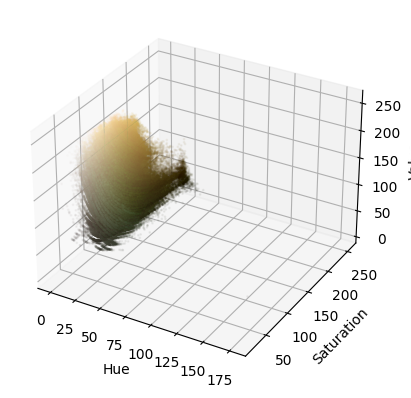

In [8]:

plot_hsv_distribution(img_path)

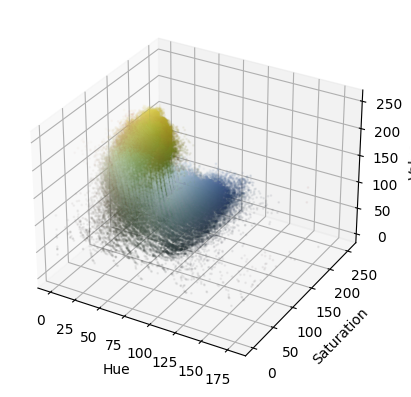

In [9]:
plot_hsv_distribution(img_path_2)

In [10]:
from scipy.stats import multivariate_normal
import numpy as np

def multi_dist(img_path):


    # Load the image and convert it to HSV colorspace
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Reshape the 3D HSV array to a 2D array of shape (n_pixels, 3)
    h_flat = hsv[:,:,0].flatten()
    s_flat = hsv[:,:,1].flatten()
    v_flat = hsv[:,:,2].flatten()
    hsv = np.column_stack((h_flat, s_flat, v_flat))

    mean = np.mean(hsv, axis=0)
    cov = np.cov(hsv.T)

    return mean, cov



### Mahalanobis distance

In [11]:
def mahalanobis(img_path_1, img_path_2):
    """Calculates the Mahalanobis distance and overlap between two multivariate normal distributions.
    
    Args:
        mean1 (ndarray): Mean of the first distribution.
        cov1 (ndarray): Covariance matrix of the first distribution.
        mean2 (ndarray): Mean of the second distribution.
        cov2 (ndarray): Covariance matrix of the second distribution.
    
    Returns:
        float: Percentage of overlap between the two distributions using the probability density function (PDF).
    """
    mean1, cov1 = multi_dist(img_path_1)
    mean2, cov2 = multi_dist(img_path_2)

    # Create two multivariate normal distribution objects
    dist1 = multivariate_normal(mean1, cov1)
    dist2 = multivariate_normal(mean2, cov2)

    # Calculate the Mahalanobis distance between the two means
    mahalanobis_dist = np.sqrt((mean1 - mean2) @ np.linalg.inv((cov1 + cov2) / 2) @ (mean1 - mean2))

    # Calculate the overlap between the two distributions using the PDF
    n_samples = 1000
    samples1 = dist1.rvs(n_samples)
    samples2 = dist2.rvs(n_samples)
    overlap = np.mean(dist1.cdf(samples2) + dist2.cdf(samples1))

    return overlap * 100

In [12]:
mahalanobis(img_path, img_path_2)

35.95451613446251

##### Dynamic Range of Images
https://en.wikipedia.org/wiki/Dynamic_range

In [13]:
import numpy as np
from scipy.stats import lognorm, expon, weibull_min, gamma, beta

# Log-Normal Distribution
def fit_lognormal(data):
    params = lognorm.fit(data)
    return params

# Exponential Distribution
def fit_exponential(data):
    params = expon.fit(data)
    return params

# Weibull Distribution
def fit_weibull(data):
    params = weibull_min.fit(data)
    return params

# Gamma Distribution
def fit_gamma(data):
    params = gamma.fit(data)
    return params

# Beta Distribution
def fit_beta(data):
    params = beta.fit(data)
    return params

# Skewness Calculation
def calculate_skewness(data):
    skewness = np.mean((data - np.mean(data)) ** 3) / np.power(np.var(data), 1.5)
    return skewness

In [14]:

def analyze_dynamic_range(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate the minimum and maximum pixel intensities
    min_intensity = np.min(image)
    max_intensity = np.max(image)

    # Calculate the dynamic range
    dynamic_range = max_intensity - min_intensity

    # Calculate the histogram of pixel intensities
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Calculate cumulative distribution function (CDF)
    cdf = histogram.cumsum()

    # Normalize the CDF
    cdf_normalized = cdf * histogram.max() / cdf.max()

    # Visualize the histogram and CDF
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(image.flatten(), bins=256, range=[0, 256], color='b')
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.plot(cdf_normalized, color='r')
    plt.title('CDF (Cumulative Distribution Function)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('CDF')

    plt.tight_layout()
    plt.show()

    data = np.array(image.flatten())
    # Fit distributions
    lognormal_params = fit_lognormal(data)
    exponential_params = fit_exponential(data)
    weibull_params = fit_weibull(data)
    gamma_params = fit_gamma(data)
    beta_params = fit_beta(data)

    # Calculate skewness
    skewness = calculate_skewness(data)

    print("Log-Normal Distribution Parameters:", lognormal_params)
    print("Exponential Distribution Parameters:", exponential_params)
    print("Weibull Distribution Parameters:", weibull_params)
    print("Gamma Distribution Parameters:", gamma_params)
    print("Beta Distribution Parameters:", beta_params)
    print("Skewness:", skewness)

    # Print the dynamic range
    print("Minimum Intensity:", min_intensity)
    print("Maximum Intensity:", max_intensity)
    print("Dynamic Range:", dynamic_range)
    print("Average Range:", np.mean(image.flatten()))
    print("Standard Deviation:", np.std(image.flatten()))




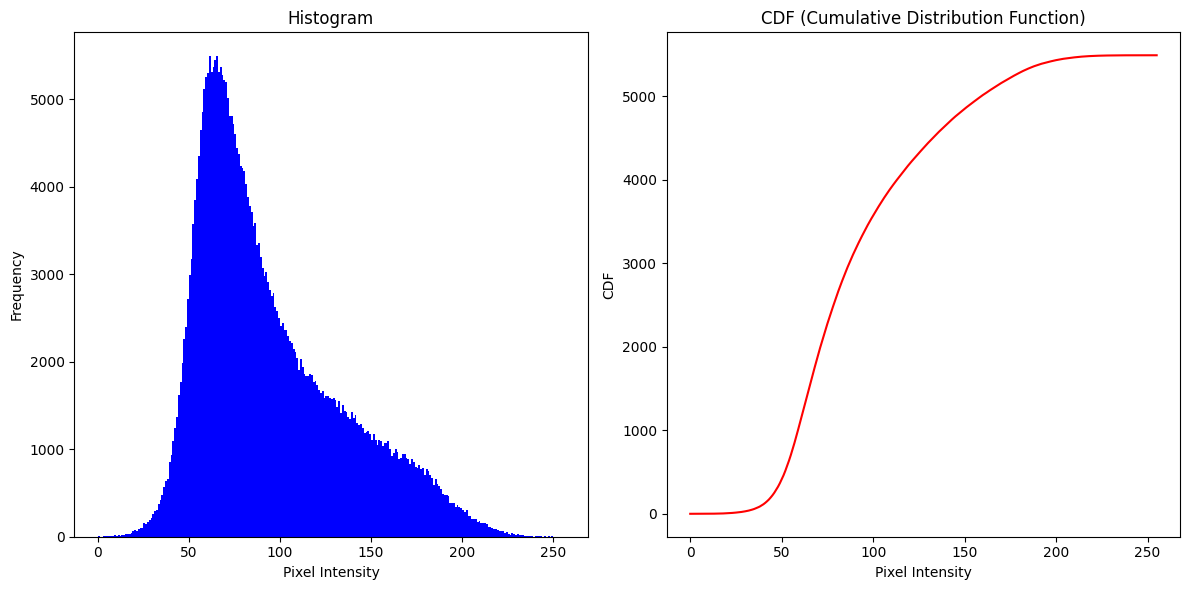

c:\Users\Charl\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Log-Normal Distribution Parameters: (0.4008585541136165, -2.401502277114356, 89.03212954017943)
Exponential Distribution Parameters: (0.0, 94.10416748146451)
Weibull Distribution Parameters: (2.516389167401077, -0.013587225178015989, 106.37689920333828)
Gamma Distribution Parameters: (6.048425169000474, -0.12235405271571259, 15.578676184319445)
Beta Distribution Parameters: (6.076193993573053, 414.7816316373177, -0.01977356377018369, 6541.474961608032)
Skewness: 0.8995705921916846
Minimum Intensity: 0
Maximum Intensity: 254
Dynamic Range: 254
Average Range: 94.10416748146451
Standard Deviation: 39.83583511265128


In [15]:
# Usage example
analyze_dynamic_range(img_path)

##### Edge Detection
* Canny Edge detectin with different hysterisis thresholds
* Sobel Kernel
* Roberts Diagonal Kernel
* Laplacian of Gaussian kernel

In [16]:
def canny_edge_detection(image_path, threshold1, threshold2, gray_scale=False):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    if gray_scale:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    edges = cv2.Canny(image, threshold1=threshold1, threshold2=threshold2, apertureSize=3, L2gradient=False)
    return edges

def sobel_operator(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    magnitude = np.uint8(magnitude)
    return magnitude

def laplacian_of_gaussian(image_path, kernel_size):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    return laplacian

def roberts_operator(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, -1]], dtype=np.float32)
    kernel2 = np.array([[0, 0, 0], [0, 0, 1], [0, -1, 0]], dtype=np.float32)
    roberts1 = cv2.filter2D(gray, -1, kernel1)
    roberts2 = cv2.filter2D(gray, -1, kernel2)
    magnitude = np.sqrt(roberts1**2 + roberts2**2)
    magnitude = np.uint8(magnitude)
    return magnitude


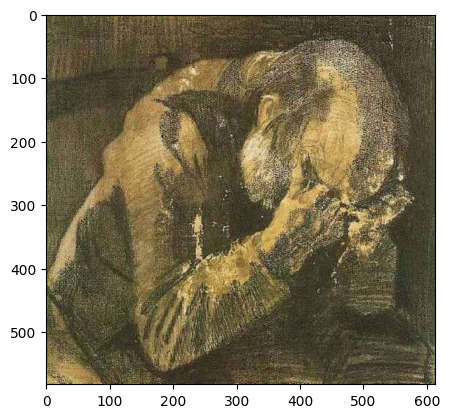

In [22]:
# Original Image For perspective
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

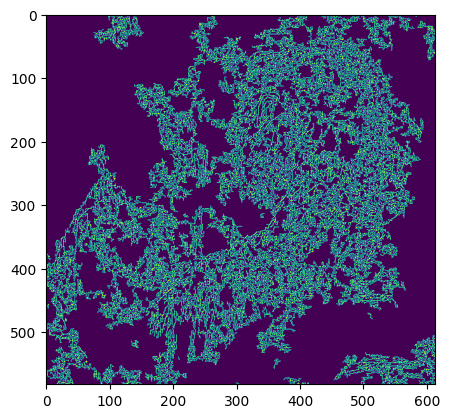

In [18]:
# Canny Edge Detection - Color
canny_sample = canny_edge_detection(img_path, 0, 500)
plt.imshow(canny_sample)
plt.show()

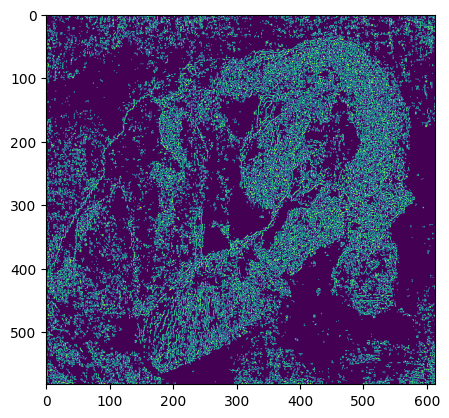

In [25]:
# Canny Edge Detection - Color
canny_sample = canny_edge_detection(img_path, 190, 200)
plt.imshow(canny_sample)
plt.show()

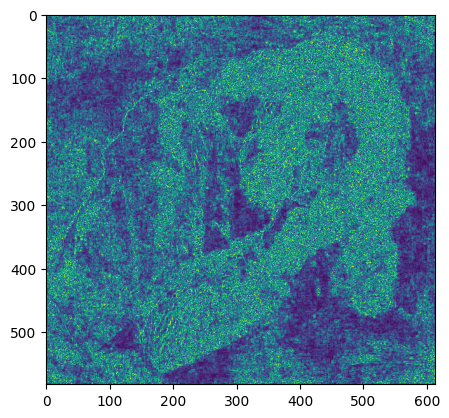

In [20]:
# Sobel Operator
mag_image = sobel_operator(img_path)
plt.imshow(mag_image)
plt.show()

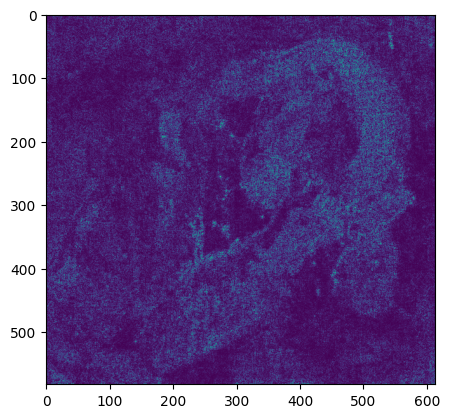

In [31]:
# Laplacian of Guassian
kern_size = 3
image = laplacian_of_gaussian(img_path, kern_size)
plt.imshow(image)
plt.show()

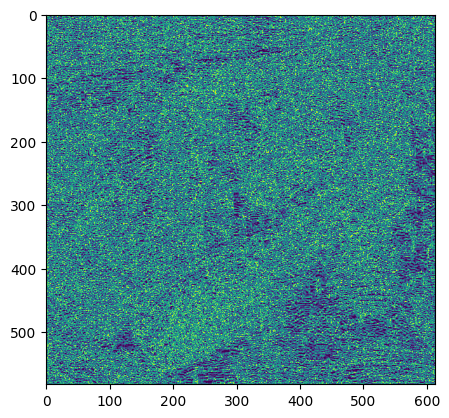

In [27]:
# Roberts operator
image = roberts_operator(img_path)
plt.imshow(image)
plt.show()

##### Symmetrical & Geometric Analysis

In [67]:
import cv2
import numpy as np
from scipy.sparse import lil_matrix
from skimage.transform import radon
from scipy.sparse.csgraph import maximum_bipartite_matching

def hough_transform(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 50, 150)
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
    
    return lines

def radon_transform(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sinogram = radon(image)
    
    return sinogram

def sift_transform(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    
    return keypoints, descriptors

def fft_transform(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    return magnitude_spectrum



def graph_symmetry_detection(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape

    graph = lil_matrix((height * width, height * width), dtype=bool)

    # Connect neighboring pixels with edges
    for i in range(height):
        for j in range(width):
            pixel_index = i * width + j

            if i > 0:
                graph[pixel_index, (i - 1) * width + j] = True
            if i < height - 1:
                graph[pixel_index, (i + 1) * width + j] = True
            if j > 0:
                graph[pixel_index, i * width + (j - 1)] = True
            if j < width - 1:
                graph[pixel_index, i * width + (j + 1)] = True

    # Convert lil_matrix to coo_matrix
    graph_coo = graph.tocoo()

    # Find maximum bipartite matching to detect symmetry
    matching = maximum_bipartite_matching(graph_coo, perm_type='column')

    return matching

In [62]:
# Hough Transform
line_image = hough_transform(img_path)

In [68]:
# # Radon Transform
sino = radon_transform(img_path)
print(sino)

c:\Users\Charl\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


[[228.41960784 129.1829851  123.79682054 ...  81.89244223  83.66907488
   90.70834868]
 [216.07843137 155.73860499 135.08055899 ...  86.86863365  90.25835106
  104.35395661]
 [219.68235294 168.88733598 148.37145042 ...  90.67920798  97.71116683
  120.05042998]
 ...
 [162.79215686 118.52277641  96.3378893  ... 110.7853529  119.35964948
  155.68509447]
 [164.76470588 100.79803598  92.566145   ... 104.20213928 110.03625178
  127.61373995]
 [165.01568627  90.08804133  86.82276264 ...  94.39452766 102.43881504
  102.92885249]]


In [64]:
# Sift Transform
sift_transform(img_path)[1]

array([[  4.,   3.,   2., ...,  98.,  24.,  38.],
       [ 36.,  22.,  74., ...,   0.,   0.,   0.],
       [  2.,   1.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 23.,  14.,  19., ...,   0.,   0.,   0.],
       [104.,  22.,   9., ...,   0.,   0.,   2.],
       [ 41.,  49.,  18., ...,   3.,   6.,   9.]], dtype=float32)

In [39]:
fft_transform(img_path)

array([[150.26387445, 151.67073422, 145.92874979, ..., 122.0239017 ,
        159.49736696, 145.01950691],
       [143.00392239, 151.96539458, 152.9153697 , ..., 134.14971635,
        163.86413445, 163.5737283 ],
       [154.02727393, 151.9143458 , 134.20300335, ..., 128.30925459,
        159.55762703, 150.73530663],
       ...,
       [154.02727393, 150.73530663, 159.55762703, ..., 143.13429987,
        134.20300335, 151.9143458 ],
       [143.00392239, 163.5737283 , 163.86413445, ..., 151.50246938,
        152.9153697 , 151.96539458],
       [150.26387445, 145.01950691, 159.49736696, ..., 142.24465108,
        145.92874979, 151.67073422]])

In [44]:
graph_symmetry_detection(img_path)

array([     1,      0,      3, ..., 357958, 357961, 357960])

# Possibly Utilize Clustering Algorithms
* Dendrogram Decision 
* K-means: Derivative of Elbow
* K-means: Silhoutte widths 